<a href="https://colab.research.google.com/github/souvik25162/Machine-Learning/blob/master/loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files 
uploaded=files.upload()
df=pd.read_csv('Loan.csv')
df.head()

Saving Loan.csv to Loan.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#step1:
print(df.shape)
df.isna().sum()

(614, 13)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
#df.dropna(axis=0)

df['LoanAmount']=df['LoanAmount'].replace(np.nan,np.mean(df['LoanAmount']))

In [5]:
df['CoapplicantIncome']=df['CoapplicantIncome'].replace(np.nan,np.mean(df['CoapplicantIncome']))


In [6]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [7]:
df['Credit_History']=df['Credit_History'].replace(np.nan,0.0)

In [8]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
192/422

0.4549763033175355

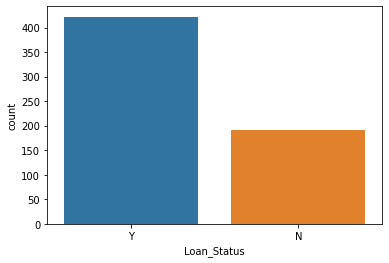

In [10]:
sns.countplot(df['Loan_Status'],label='count')

In [11]:
#step2:encode the categorical variable

from sklearn.preprocessing import LabelEncoder
label_encY=LabelEncoder()
df['Loan_Status']=label_encY.fit_transform(df['Loan_Status'].values)

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [13]:
df=df.drop(columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1)

In [17]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].replace(np.nan,np.mean(df['Loan_Amount_Term']))

In [18]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1
1,4583,1508.0,128.000000,360.0,1.0,0
2,3000,0.0,66.000000,360.0,1.0,1
3,2583,2358.0,120.000000,360.0,1.0,1
4,6000,0.0,141.000000,360.0,1.0,1


In [19]:
df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

In [22]:
df.iloc[:,0:5].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,0.006986
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.058795
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.034518
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.005446
Credit_History,0.006986,-0.058795,-0.034518,0.005446,1.000000


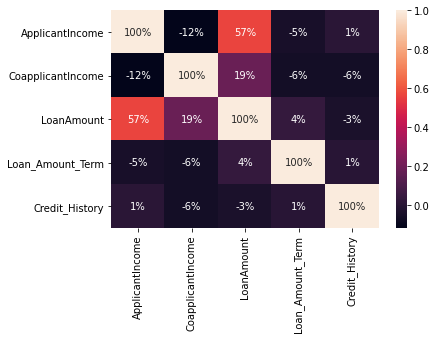

In [23]:
plt.figure()
sns.heatmap(df.iloc[:,0:5].corr(),annot=True,fmt='.0%')

In [75]:
#step no 3
X=df.iloc[:,0:5]
Y=df['Loan_Status']

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [77]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [29]:
def models(x_train,y_train):
  #logistic
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(x_train,y_train)

  #Decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(x_train,y_train)

  #rf
  from sklearn.ensemble import RandomForestClassifier
  rf= RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
  rf.fit(x_train,y_train)

  #print the model accuracy
  print('[0] Logistic accuracy:',log.score(x_train,y_train))
  print('[1] Decision Tree accuracy:',tree.score(x_train,y_train))
  print('[2] random forest accuracy:',rf.score(x_train,y_train))

In [30]:
model=models(x_train,y_train)

[0] Logistic accuracy: 0.7657841140529531
[1] Decision Tree accuracy: 1.0
[2] random forest accuracy: 0.9735234215885947


In [31]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix 

In [35]:
pred=log.predict(x_test)

In [36]:
pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [39]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int64

In [40]:
accuracy_score(pred,y_test)

0.7886178861788617

In [41]:
f1_score(pred,y_test)

0.8617021276595744

In [42]:
confusion_matrix(pred,y_test)

array([[16,  9],
       [17, 81]])

In [ ]:
precision=TP/(TP+FP)
Recall= TP/(TP+FN)
f1_score= harmonic_mean( precision, reacall)
accuracy_score= TP+TN/(TP+TN+FP+FN)

In [ ]:
#NEURAL NETWORK

ACTIVATION LAYERS=SIGMOID, RELU, LEAKY_RELU, SOFTMAX


In [ ]:
step1: step up a model
step2: compile the model
step3: calculate the loss
step 4: fit the model.
step5: accuracy calculation

In [44]:
###INPUT>HIDDEN>OUTPUT
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [81]:
my_model=Sequential()
my_model.add(Dense(16,input_dim=5,activation='relu'))
my_model.add(Dropout(0.3))
my_model.add(Dense(32,activation='relu'))
my_model.add(Dropout(0.3))
my_model.add(Dense(64,activation='relu'))
my_model.add(Dropout(0.3))
my_model.add(Dense(1,activation='sigmoid'))

In [82]:
my_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
history=my_model.fit(x_train,y_train,epochs=50,validation_split=0.2,batch_size=128)

Train on 392 samples, validate on 99 samples
Epoch 1/50
392/392 [==============================] - 0s 32us/step - loss: 0.6266 - accuracy: 0.7296 - val_loss: 0.5984 - val_accuracy: 0.7576
Epoch 2/50
392/392 [==============================] - 0s 32us/step - loss: 0.6122 - accuracy: 0.7143 - val_loss: 0.5944 - val_accuracy: 0.7576
Epoch 3/50
392/392 [==============================] - 0s 31us/step - loss: 0.6285 - accuracy: 0.7143 - val_loss: 0.5907 - val_accuracy: 0.7576
Epoch 4/50
392/392 [==============================] - 0s 36us/step - loss: 0.6251 - accuracy: 0.7347 - val_loss: 0.5878 - val_accuracy: 0.7576
Epoch 5/50
392/392 [==============================] - 0s 39us/step - loss: 0.6107 - accuracy: 0.7117 - val_loss: 0.5855 - val_accuracy: 0.7576
Epoch 6/50
392/392 [==============================] - 0s 31us/step - loss: 0.6075 - accuracy: 0.6964 - val_loss: 0.5828 - val_accuracy: 0.7576
Epoch 7/50
392/392 [==============================] - 0s 33us/step - loss: 0.6162 - accuracy: 0.7

In [ ]:
my_model.predict(x_test)